In [ ]:
import json
import pandas as pd
import torch
from torchvision.ops import nms
import pickle
import io
with open('.\pred.json') as f:
    d = json.load(f)

for i in range(len(d)):
    d[i]['bbox'][2] += d[i]['bbox'][0]
    d[i]['bbox'][3] += d[i]['bbox'][1]

d_pd = pd.DataFrame(d)
d_pd['x'] = [d_pd['bbox'][i][0] for i in range(len(d_pd))]

pred_num = {'image_id' : [], 'pred_label' : []}
for i in range(1, 13069):
    nums = (d_pd[(d_pd['image_id'] == i) & (d_pd['score'] > 0.7)].sort_values('x')['category_id'] - 1).astype(str)
    if len(nums) == 0:
        app_num = -1
    else:
        app_num = int("".join(nums))

    if app_num == -1:
        boxes = [x['bbox'] for x in d if x['image_id'] == i]
        scores = [x['score'] for x in d if x['image_id'] == i]
        label = [x['category_id'] for x in d if x['image_id'] == i]
        if len(boxes) == 0:
            pred_num['image_id'].append(i)
            pred_num['pred_label'].append(app_num)
            continue

        boxes = torch.tensor(boxes,dtype =  torch.float)
        scores = torch.tensor(scores,dtype =  torch.float)
        label = torch.tensor(label,dtype =  torch.float)
        # IoU threshold: 0.5 is standard, can adjust
        iou_threshold = 0.3

        # Apply NMS
        keep_indices = nms(boxes, scores, iou_threshold)

        # Get final boxes and scores
        final_boxes = boxes[keep_indices]
        final_scores = scores[keep_indices]
        final_label = label[keep_indices]

        final_label = final_label[torch.argsort(final_boxes.T, descending=True)][0]

        final_label = final_label[:min(3, len(final_label))]
        # print(i)
        # print(final_boxes)
        # print(final_scores)
        # print(final_label - 1)
        app_num = int("".join([str(int(x.numpy()) - 1) for x in final_label]))

    pred_num['image_id'].append(i)
    pred_num['pred_label'].append(app_num)

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35256\1231169147.py:2: SyntaxWarning: invalid escape sequence '\p'
  with open('.\pred.json') as f:


In [ ]:
pred_df.to_csv('./pred.csv', index=False)

In [ ]:

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)



with open('training_stats.pkl', 'rb') as f:
    data_1 = CPU_Unpickler(f).load()
    
with open('training_stats_0.pkl', 'rb') as f:
    data_0 = CPU_Unpickler(f).load()


In [ ]:
training_stats_df_1 = pd.DataFrame(data_1)
training_stats_df_0 = pd.DataFrame(data_0)

epoch  = []
for i in range(3007 * 10):
    epoch.append(i // 3007)

training_stats_df_1['epoch'] = epoch
training_stats_df_0['epoch'] = epoch

epoch_loss_df_1 = training_stats_df_1.groupby('epoch').sum().reset_index(drop= True)
epoch_loss_df_0 = training_stats_df_0.groupby('epoch').sum().reset_index(drop= True)

for i in range(10):
    for j in range(4):
        epoch_loss_df_1.iloc[i, j] = float(epoch_loss_df_1.iloc[i, j].detach())
        epoch_loss_df_0.iloc[i, j] = float(epoch_loss_df_0.iloc[i, j].detach())

c:\Users\Lenovo\miniconda3\envs\PatternR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\miniconda3\envs\PatternR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\miniconda3\envs\PatternR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\miniconda3\envs\PatternR\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

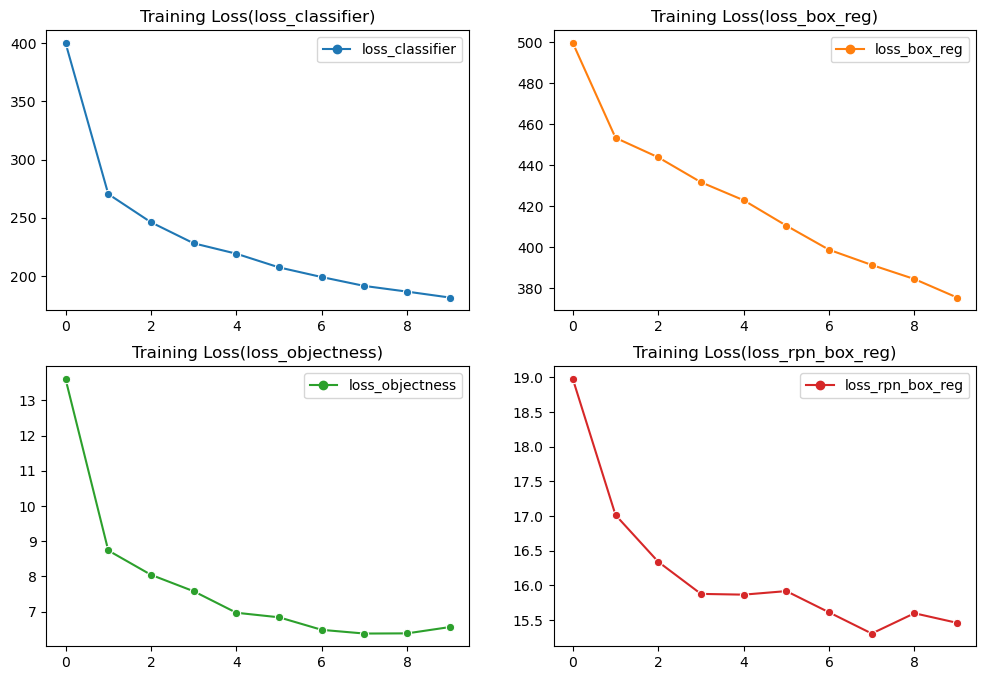

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2)


ax[0][0].set_title('Training Loss(loss_classifier)')
sns.lineplot(data = epoch_loss_df_1[["loss_classifier"]], ax= ax[0][0], palette=[sns.color_palette()[0]], markers = 'o')

ax[0][1].set_title('Training Loss(loss_box_reg)')
sns.lineplot(data = epoch_loss_df_1[["loss_box_reg"]], ax= ax[0][1], palette=[sns.color_palette()[1]], markers = 'o')

ax[1][0].set_title('Training Loss(loss_objectness)')
sns.lineplot(data = epoch_loss_df_1[["loss_objectness"]], ax= ax[1][0], palette=[sns.color_palette()[2]], markers = 'o')

ax[1][1].set_title('Training Loss(loss_rpn_box_reg)')
sns.lineplot(data = epoch_loss_df_1[["loss_rpn_box_reg"]], ax= ax[1][1], palette=[sns.color_palette()[3]], markers = 'o')
fig.set_size_inches(12, 8)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35256\2470824075.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = temp, ax= ax[0][0], palette=[sns.color_palette()[0]], markers = 'o')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35256\2470824075.py:6: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = temp, ax= ax[0][0], palette=[sns.color_palette()[0]], markers = 'o')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35256\2470824075.py:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = temp, ax= ax[0][1], palette=[sns.color_palette()[1]], markers = 'o')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35256\2470824075.py:11: UserWarning: 
The markers list has fewer values (1) than needed (2) and 

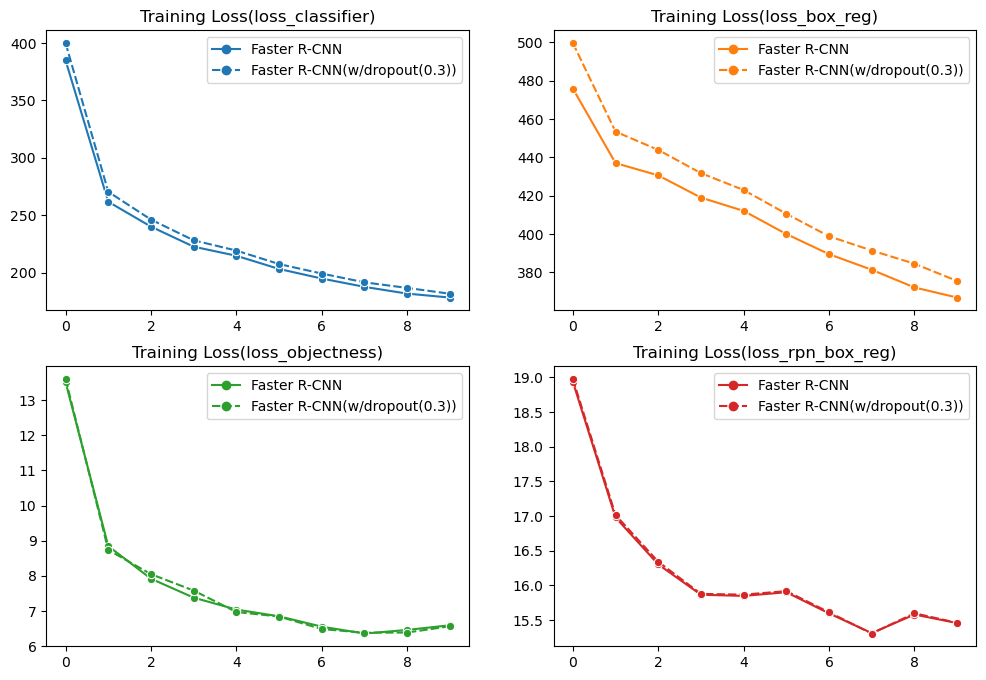

In [19]:
fig, ax = plt.subplots(2, 2)

temp = pd.DataFrame({'Faster R-CNN': epoch_loss_df_0["loss_classifier"], 'Faster R-CNN(w/dropout(0.3))': epoch_loss_df_1["loss_classifier"]})

ax[0][0].set_title('Training Loss(loss_classifier)')
sns.lineplot(data = temp, ax= ax[0][0], palette=[sns.color_palette()[0]], markers = 'o')

temp['Faster R-CNN'] = epoch_loss_df_0["loss_box_reg"]
temp['Faster R-CNN(w/dropout(0.3))'] = epoch_loss_df_1["loss_box_reg"]
ax[0][1].set_title('Training Loss(loss_box_reg)')
sns.lineplot(data = temp, ax= ax[0][1], palette=[sns.color_palette()[1]], markers = 'o')

temp['Faster R-CNN'] = epoch_loss_df_0["loss_objectness"]
temp['Faster R-CNN(w/dropout(0.3))'] = epoch_loss_df_1["loss_objectness"]
ax[1][0].set_title('Training Loss(loss_objectness)')
sns.lineplot(data = temp, ax= ax[1][0], palette=[sns.color_palette()[2]], markers = 'o')

temp['Faster R-CNN'] = epoch_loss_df_0["loss_rpn_box_reg"]
temp['Faster R-CNN(w/dropout(0.3))'] = epoch_loss_df_1["loss_rpn_box_reg"]
ax[1][1].set_title('Training Loss(loss_rpn_box_reg)')
sns.lineplot(data = temp, ax= ax[1][1], palette=[sns.color_palette()[3]], markers = 'o')
fig.set_size_inches(12, 8)

In [ ]:
with open('val_stats.pkl', 'rb') as f:
    val_data_1 = CPU_Unpickler(f).load()
with open('val_stats_0.pkl', 'rb') as f:
    val_data_0 = CPU_Unpickler(f).load()
val_df_1 = pd.DataFrame(val_data_1)
val_df_0 = pd.DataFrame(val_data_0)

val_df_1["label_acc"] = [float(x) for x in val_df_1["label_acc"]]
val_df_0["label_acc"] = [float(x) for x in val_df_0["label_acc"]]

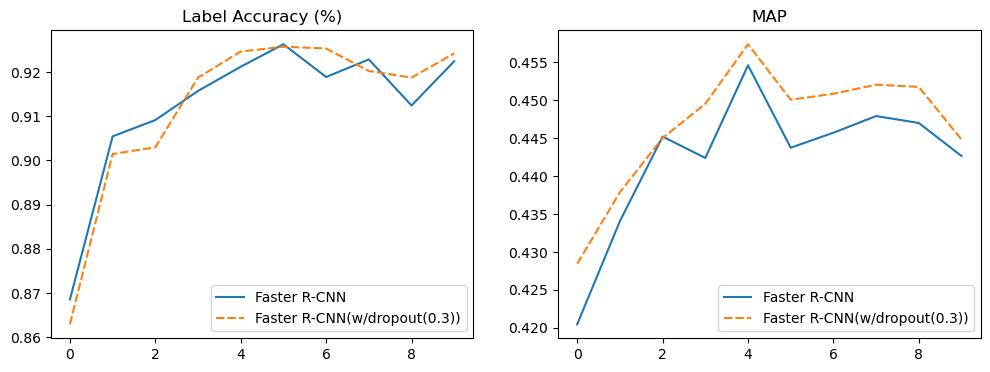

In [124]:
temp = pd.DataFrame({'Faster R-CNN': val_df_0["label_acc"], 'Faster R-CNN(w/dropout(0.3))': val_df_1["label_acc"]})

fig, ax = plt.subplots(1, 2)

ax[0].set_title('Label Accuracy (%)')
sns.lineplot(data = temp, ax= ax[0])

temp['Faster R-CNN'] = val_df_0["evalMAP"]
temp['Faster R-CNN(w/dropout(0.3))'] = val_df_1["evalMAP"]
ax[1].set_title('MAP')
sns.lineplot(data = temp, ax= ax[1])

fig.set_size_inches(12, 4)